In [47]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Lambda
from keras.models import Sequential, load_model, model_from_json
from tensorflow.python.framework import ops
import keras.backend as K
import tensorflow as tf
import numpy as np
import keras
import sys
import os
import cv2
import math
import matplotlib.pyplot as plt
from PIL import Image

In [48]:
json_file = open('../models/comparison_model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

In [49]:
model.load_weights('../models/comparison-19-0.0166.h5')

In [50]:
width, height = 64, 64
train_data_dir = '../kostki/zdjecia_gen/train'
test_data_dir = '../kostki/zdjecia_gen/test'
nb_train_samples = 40320
nb_test_samples = 10080
epochs = 20
batch_size = 64

input_shape = (width, height, 3)

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [52]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

Found 50400 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


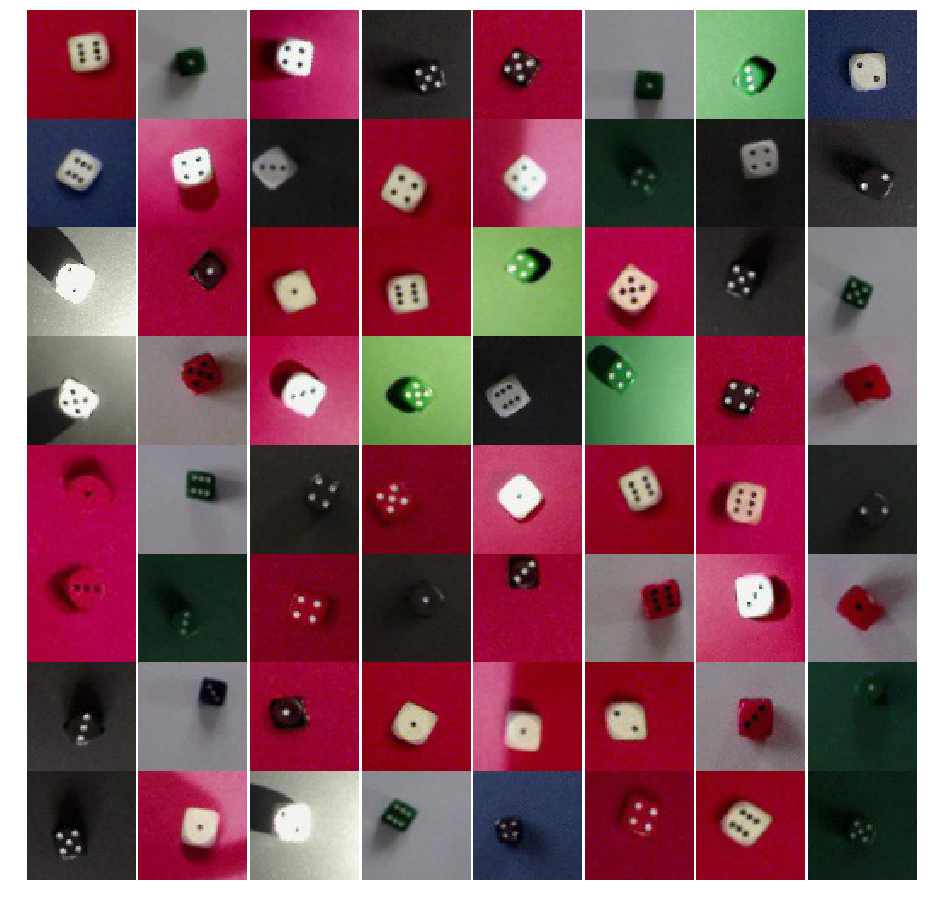

In [53]:
x_batch, y_batch = next(train_generator)
fig = plt.figure(figsize=(16,16))
for i in range(0, 64):
    plt.subplot(8,8,1+i)
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.gray()
    image = x_batch[i]
    image = image.squeeze()
    plt.imshow(image)
plt.show()

In [ ]:
# import random
# rows, cols = 64, 64
# fig = plt.figure(figsize=(16,16))
# for i in range(0,64):
#     plt.subplot(8,8,1+i)
#     plt.axis('off')
#     plt.subplots_adjust(wspace=0, hspace=0)
#     random_image = random.randint(0, 100800)
#     img=immatrix[random_image].reshape(rows, cols)
#     plt.imshow(img)
# plt.show()

(64, 64, 3)


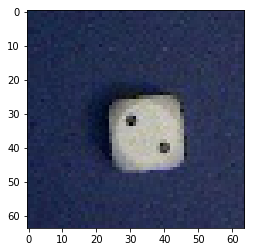

In [98]:
image = x_batch[random.randint(0, batch_size-1)]
print(image.shape)
plt.imshow(image)

In [99]:
image_expand = np.expand_dims(image, axis=0)
print(image_expand.shape)

(1, 64, 64, 3)


In [188]:
def layer_to_visualize(layer, image):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(image)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(16,8))
    print(len(convolutions))
    for i in range(len(convolutions) // 4):
        ax = fig.add_subplot(4,4,i+1)
        plt.axis('off')
        ax.imshow(convolutions[i], cmap='gray')
        plt.subplots_adjust(wspace=0, hspace=1)

In [189]:
model.layers

In [190]:
layer_num = 3

In [191]:
model.layers[layer_num].output.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

Shape of conv: (28, 28, 32)
28


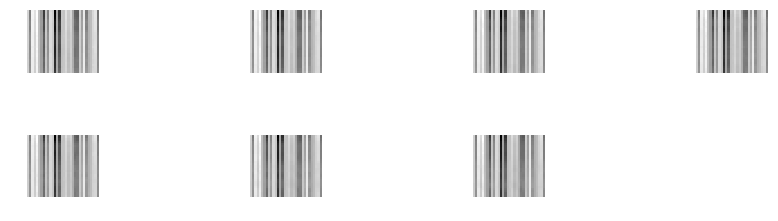

In [192]:
layer_to_visualize(model.layers[layer_num], image_expand)